In [ ]:
!pip install scikit-surprise

In [ ]:
import numpy as np
import pandas as pd
from surprise import Dataset
from surprise import Reader
from surprise import SVD, SVDpp, SlopeOne, NMF, NormalPredictor, KNNBaseline, KNNBasic, KNNWithMeans, KNNWithZScore, BaselineOnly, CoClustering
from surprise.model_selection import train_test_split
from surprise import accuracy
from collections import defaultdict

In [ ]:
anime_df = pd.read_csv('/content/drive/My Drive/AnimeList.csv')
review_df = pd.read_csv('/content/drive/My Drive/UserAnimeList.csv')

In [ ]:
anime_df.shape

(14478, 31)

In [ ]:
review_df.shape

(1048575, 11)

In [ ]:
anime_df.head()

,anime_id,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,airing,aired_string,aired,duration,rating,score,scored_by,rank,popularity,members,favorites,background,premiered,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme
0,11013,Inu x Boku SS,Inu X Boku Secret Service,妖狐×僕SS,Youko x Boku SS,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,12,Finished Airing,False,"Jan 13, 2012 to Mar 30, 2012","{'from': '2012-01-13', 'to': '2012-03-30'}",24 min. per ep.,PG-13 - Teens 13 or older,7.63,139250,1274.0,231,283882,2809,Inu x Boku SS was licensed by Sentai Filmworks...,Winter 2012,Fridays at Unknown,"{'Adaptation': [{'mal_id': 17207, 'type': 'man...","Aniplex, Square Enix, Mainichi Broadcasting Sy...",Sentai Filmworks,David Production,"Comedy, Supernatural, Romance, Shounen","['""Nirvana"" by MUCC']","['#1: ""Nirvana"" by MUCC (eps 1, 11-12)', '#2: ..."
1,2104,Seto no Hanayome,My Bride is a Mermaid,瀬戸の花嫁,The Inland Sea Bride,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,26,Finished Airing,False,"Apr 2, 2007 to Oct 1, 2007","{'from': '2007-04-02', 'to': '2007-10-01'}",24 min. per ep.,PG-13 - Teens 13 or older,7.89,91206,727.0,366,204003,2579,NaN,Spring 2007,Unknown,"{'Adaptation': [{'mal_id': 759, 'type': 'manga...","TV Tokyo, AIC, Square Enix, Sotsu",Funimation,Gonzo,"Comedy, Parody, Romance, School, Shounen","['""Romantic summer"" by SUN&LUNAR']","['#1: ""Ashita e no Hikari (明日への光)"" by Asuka Hi..."
2,5262,Shugo Chara!! Doki,Shugo Chara!! Doki,しゅごキャラ！！どきっ,"Shugo Chara Ninenme, Shugo Chara! Second Year",https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,51,Finished Airing,False,"Oct 4, 2008 to Sep 25, 2009","{'from': '2008-10-04', 'to': '2009-09-25'}",24 min. per ep.,PG - Children,7.55,37129,1508.0,1173,70127,802,NaN,Fall 2008,Unknown,"{'Adaptation': [{'mal_id': 101, 'type': 'manga...","TV Tokyo, Sotsu",NaN,Satelight,"Comedy, Magic, School, Shoujo","['#1: ""Minna no Tamago (みんなのたまご)"" by Shugo Cha...","['#1: ""Rottara Rottara (ロッタラ ロッタラ)"" by Buono! ..."
3,721,Princess Tutu,Princess Tutu,プリンセスチュチュ,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Original,38,Finished Airing,False,"Aug 16, 2002 to May 23, 2003","{'from': '2002-08-16', 'to': '2003-05-23'}",16 min. per ep.,PG-13 - Teens 13 or older,8.21,36501,307.0,916,93312,3344,Princess Tutu aired in two parts. The first pa...,Summer 2002,Fridays at Unknown,"{'Adaptation': [{'mal_id': 1581, 'type': 'mang...","Memory-Tech, GANSIS, Marvelous AQL",ADV Films,Hal Film Maker,"Comedy, Drama, Magic, Romance, Fantasy","['""Morning Grace"" by Ritsuko Okazaki']","['""Watashi No Ai Wa Chiisaikeredo"" by Ritsuko ..."
4,12365,Bakuman. 3rd Season,Bakuman.,バクマン。,Bakuman Season 3,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,25,Finished Airing,False,"Oct 6, 2012 to Mar 30, 2013","{'from': '2012-10-06', 'to': '2013-03-30'}",24 min. per ep.,PG-13 - Teens 13 or older,8.67,107767,50.0,426,182765,2082,NaN,Fall 2012,Unknown,"{'Adaptation': [{'mal_id': 9711, 'type': 'mang...","NHK, Shueisha",NaN,J.C.Staff,"Comedy, Drama, Romance, Shounen","['#1: ""Moshimo no Hanashi (もしもの話)"" by nano.RIP...","['#1: ""Pride on Everyday"" by Sphere (eps 1-13)..."


In [ ]:
review_df.head()

,username,anime_id,my_watched_episodes,my_start_date,my_finish_date,my_score,my_status,my_rewatching,my_rewatching_ep,my_last_updated,my_tags
0,karthiga,21,586,0000-00-00,0000-00-00,9,1,NaN,0,1362307973,NaN
1,karthiga,59,26,0000-00-00,0000-00-00,7,2,NaN,0,1362923691,NaN
2,karthiga,74,26,0000-00-00,0000-00-00,7,2,NaN,0,1367081015,NaN
3,karthiga,120,26,0000-00-00,0000-00-00,7,2,NaN,0,1362308037,NaN
4,karthiga,178,26,0000-00-00,0000-00-00,7,2,0.0,0,1364399953,NaN


In [ ]:
df = pd.merge(review_df, anime_df, on="anime_id", suffixes=('_review','_anime'))
df.head()

,username,anime_id,my_watched_episodes,my_start_date,my_finish_date,my_score,my_status,my_rewatching,my_rewatching_ep,my_last_updated,my_tags,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,airing,aired_string,aired,duration,rating,score,scored_by,rank,popularity,members,favorites,background,premiered,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme
0,karthiga,21,586,0000-00-00,0000-00-00,9,1,NaN,0,1362307973,NaN,One Piece,One Piece,ONE PIECE,OP,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,0,Currently Airing,True,"Oct 20, 1999 to ?","{'from': '1999-10-20', 'to': None}",24 min.,PG-13 - Teens 13 or older,8.54,423868,91.0,35,720133,69760,Several anime-original arcs have been adapted ...,Fall 1999,Sundays at 09:30 (JST),"{'Adaptation': [{'mal_id': 13, 'type': 'manga'...","Fuji TV, TAP, Shueisha","Funimation, 4Kids Entertainment",Toei Animation,"Action, Adventure, Comedy, Super Power, Drama,...","['#01: ""We Are! (ウィーアー!)"" by Hiroshi Kitadani ...","['#01: ""memories"" by Maki Otsuki (eps 1-30)', ..."
1,RedvelvetDaisuki,21,0,0000-00-00,0000-00-00,0,3,0.0,0,1355480701,NaN,One Piece,One Piece,ONE PIECE,OP,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,0,Currently Airing,True,"Oct 20, 1999 to ?","{'from': '1999-10-20', 'to': None}",24 min.,PG-13 - Teens 13 or older,8.54,423868,91.0,35,720133,69760,Several anime-original arcs have been adapted ...,Fall 1999,Sundays at 09:30 (JST),"{'Adaptation': [{'mal_id': 13, 'type': 'manga'...","Fuji TV, TAP, Shueisha","Funimation, 4Kids Entertainment",Toei Animation,"Action, Adventure, Comedy, Super Power, Drama,...","['#01: ""We Are! (ウィーアー!)"" by Hiroshi Kitadani ...","['#01: ""memories"" by Maki Otsuki (eps 1-30)', ..."
2,Damonashu,21,418,0000-00-00,0000-00-00,10,1,0.0,0,1254296345,NaN,One Piece,One Piece,ONE PIECE,OP,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,0,Currently Airing,True,"Oct 20, 1999 to ?","{'from': '1999-10-20', 'to': None}",24 min.,PG-13 - Teens 13 or older,8.54,423868,91.0,35,720133,69760,Several anime-original arcs have been adapted ...,Fall 1999,Sundays at 09:30 (JST),"{'Adaptation': [{'mal_id': 13, 'type': 'manga'...","Fuji TV, TAP, Shueisha","Funimation, 4Kids Entertainment",Toei Animation,"Action, Adventure, Comedy, Super Power, Drama,...","['#01: ""We Are! (ウィーアー!)"" by Hiroshi Kitadani ...","['#01: ""memories"" by Maki Otsuki (eps 1-30)', ..."
3,bskai,21,75,0000-00-00,0000-00-00,8,1,0.0,0,1276637483,NaN,One Piece,One Piece,ONE PIECE,OP,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,0,Currently Airing,True,"Oct 20, 1999 to ?","{'from': '1999-10-20', 'to': None}",24 min.,PG-13 - Teens 13 or older,8.54,423868,91.0,35,720133,69760,Several anime-original arcs have been adapted ...,Fall 1999,Sundays at 09:30 (JST),"{'Adaptation': [{'mal_id': 13, 'type': 'manga'...","Fuji TV, TAP, Shueisha","Funimation, 4Kids Entertainment",Toei Animation,"Action, Adventure, Comedy, Super Power, Drama,...","['#01: ""We Are! (ウィーアー!)"" by Hiroshi Kitadani ...","['#01: ""memories"" by Maki Otsuki (eps 1-30)', ..."
4,shuzzable,21,579,0000-00-00,0000-00-00,10,1,0.0,0,1391921419,NaN,One Piece,One Piece,ONE PIECE,OP,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,0,Currently Airing,True,"Oct 20, 1999 to ?","{'from': '1999-10-20', 'to': None}",24 min.,PG-13 - Teens 13 or older,8.54,423868,91.0,35,720133,69760,Several anime-original arcs have been adapted ...,Fall 1999,Sundays at 09:30 (JST),"{'Adaptation': [{'mal_id': 13, 'type': 'manga'...","Fuji TV, TAP, Shueisha","Funimation, 4Kids Entertainment",Toei Animation,"Action, Adventure, Comedy, Super Power, Drama,...","['#01: ""We Are! (ウィーアー!)"" by Hiroshi Kitadani ...","['#01: ""memories"" by Maki Otsuki (eps 1-30)', ..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048575 entries, 0 to 1048574
Data columns (total 41 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   username             1048575 non-null  object 
 1   anime_id             1048575 non-null  int64  
 2   my_watched_episodes  1048575 non-null  int64  
 3   my_start_date        1048575 non-null  object 
 4   my_finish_date       1048575 non-null  object 
 5   my_score             1048575 non-null  int64  
 6   my_status            1048575 non-null  int64  
 7   my_rewatching        828664 non-null   float64
 8   my_rewatching_ep     1048575 non-null  int64  
 9   my_last_updated      1048575 non-null  int64  
 10  my_tags              88264 non-null    object 
 11  title                1048575 non-null  object 
 12  title_english        812981 non-null   object 
 13  title_japanese       1048384 non-null  object 
 14  title_synonyms       770683 non-null   object 
 15

In [ ]:
df.shape

(1048575, 41)

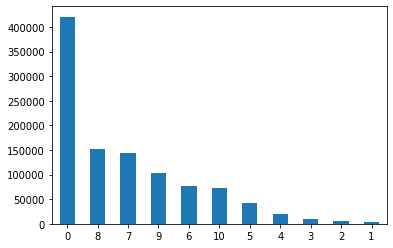

In [ ]:
df.my_score.value_counts().sort_values(ascending=False).plot(kind='bar',rot=0)

In [ ]:
df = df.drop(['title_japanese', 'title_synonyms', 'image_url', 'opening_theme', 'rank', 'popularity', 'members', 'rating', 'title', 'ending_theme', 'studio', 'licensor', 'producer','related', 'broadcast', 'premiered', 'background', 'favorites','score', 'scored_by', 'duration', 'aired', 'aired_string', 'airing', 'type', 'source', 'episodes','status', 'my_tags', 'my_last_updated', 'my_rewatching_ep', 'my_rewatching', 'my_status', 'my_finish_date', 'my_start_date', 'my_watched_episodes'], axis=1)
df.head()

,username,anime_id,my_score,title_english,genre
0,karthiga,21,9,One Piece,"Action, Adventure, Comedy, Super Power, Drama,..."
1,RedvelvetDaisuki,21,0,One Piece,"Action, Adventure, Comedy, Super Power, Drama,..."
2,Damonashu,21,10,One Piece,"Action, Adventure, Comedy, Super Power, Drama,..."
3,bskai,21,8,One Piece,"Action, Adventure, Comedy, Super Power, Drama,..."
4,shuzzable,21,10,One Piece,"Action, Adventure, Comedy, Super Power, Drama,..."


In [ ]:
df = df.rename(columns={'username': 'uid'})
df.head()

,uid,anime_id,my_score,title_english,genre
0,karthiga,21,9,One Piece,"Action, Adventure, Comedy, Super Power, Drama,..."
1,RedvelvetDaisuki,21,0,One Piece,"Action, Adventure, Comedy, Super Power, Drama,..."
2,Damonashu,21,10,One Piece,"Action, Adventure, Comedy, Super Power, Drama,..."
3,bskai,21,8,One Piece,"Action, Adventure, Comedy, Super Power, Drama,..."
4,shuzzable,21,10,One Piece,"Action, Adventure, Comedy, Super Power, Drama,..."


In [ ]:
reader = Reader(rating_scale=(0, 10))
data = Dataset.load_from_df(df[['uid', 'anime_id', 'my_score']], reader)

In [ ]:
train, test = train_test_split(data, test_size=0.40)
algo = SVD(verbose=True, n_epochs=30)

In [ ]:
algo.fit(train)

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 20
Processing epoch 21
Processing epoch 22
Processing epoch 23
Processing epoch 24
Processing epoch 25
Processing epoch 26
Processing epoch 27
Processing epoch 28
Processing epoch 29


In [ ]:
pred = algo.test(test)

In [ ]:
accuracy.rmse(pred)

RMSE: 3.5077


3.5076865333632923

In [ ]:
def get_top_n(predictions, n=10):
   top_n = defaultdict(list)
   for uid, iid, true_r, est, _ in predictions:
      top_n[uid].append((iid, est))

   # Then sort the predictions for each user and retrieve the k highest ones.
   for uid, user_ratings in top_n.items():
      user_ratings.sort(key=lambda x: x[1], reverse=True)
      top_n[uid] = user_ratings[:n]

   return top_n

In [ ]:
topn = get_top_n(pred,n=10)

In [ ]:
anime_dict = {}
for a_id in df.anime_id.unique():
    anime_dict[a_id] = df.loc[df['anime_id'] == a_id, 'title_english'].iloc[0]

In [ ]:
for uid, user_ratings in topn.items():
    print(uid, [anime_dict[iid] for (iid, _) in user_ratings])

Xephia ['Summer Wars', 'Dragon Ball', 'Angel Beats!', 'Clannad ~After Story~', 'Mushi-Shi', 'Steins;Gate', 'No Money', 'Fullmetal Alchemist: Brotherhood', 'Beck: Mongolian Chop Squad', 'Nana']
Glycyrrhizic ['Steins;Gate', nan, 'Welcome to the N.H.K.', 'New Game!', 'Mob Psycho 100', 'Your Lie in April', 'Monogatari Series: Second Season', 'Welcome to Irabu&#039;s Office', nan, 'Lupin III: The Castle of Cagliostro']
Yzui ['Rainbow', 'Clannad ~After Story~', 'Little Witch Academia: The Enchanted Parade', 'Violet Evergarden', 'Howl&#039;s Moving Castle', 'OreImo', 'Spirited Away', 'My Hero Academia 2', 'Haikyu!!', 'Naruto: Shippuden']
uchuhana ['Spirited Away', '91 Days', 'Flying Witch', 'Hyouka', 'Blue Exorcist: Kyoto Saga', 'Food Wars! The Second Plate', 'Persona 4 the Animation', 'Kuroko&#039;s Basketball', 'A Silent Voice', 'The Seven Deadly Sins']
Fu-Panda ['Eden of The East the Movie I: The King of Eden', 'Cowboy Bebop: The Movie', 'Clannad The Motion Picture', nan, 'Code Geass: Lelo

In [ ]:
df[df['uid'] == 'EvaMassacre']

,uid,anime_id,my_score,title_english,genre
2302,EvaMassacre,59,0,Chobits,"Sci-Fi, Comedy, Drama, Romance, Ecchi, Seinen"
3644,EvaMassacre,120,9,Fruits Basket,"Slice of Life, Comedy, Drama, Romance, Fantasy..."
5189,EvaMassacre,232,8,Cardcaptor Sakura,"Adventure, Comedy, Drama, Magic, Romance, Fant..."
6240,EvaMassacre,249,0,InuYasha,"Action, Adventure, Comedy, Historical, Demons,..."
9866,EvaMassacre,853,8,Ouran High School Host Club,"Comedy, Harem, Romance, School, Shoujo"
...,...,...,...,...,...
932740,EvaMassacre,33354,0,Cardcaptor Sakura: Clear Card,"Adventure, Comedy, Fantasy, Magic, Romance, Sh..."
936014,EvaMassacre,33743,0,Fuuka,"Drama, Ecchi, Music, Romance, School, Shounen"
946388,EvaMassacre,34839,0,Sanrio Boys,"Slice of Life, School"
949087,EvaMassacre,35320,9,NaN,"Fantasy, Romance, Shoujo"


In [ ]:
for n in topn['EvaMassacre']:
  print(n[0],anime_dict[n[0]], df.loc[df['anime_id'] == n[0], 'genre'].iloc[0])

30 Neon Genesis Evangelion Action, Sci-Fi, Dementia, Psychological, Drama, Mecha
3457 Vampire Knight Drama, Mystery, Romance, Shoujo, Supernatural, Vampire
3470 Special A (S.A) Comedy, Romance, School, Shoujo
11111 Another Mystery, Horror, Supernatural, Thriller, School
14353 Death Billiards Game, Mystery, Psychological, Drama, Thriller
11701 Another: The Other Horror, Mystery, Thriller
1575 Code Geass: Lelouch of the Rebellion Action, Military, Sci-Fi, Super Power, Drama, Mecha, School
23283 Terror in Resonance Mystery, Psychological, Thriller
22147 Amagi Brilliant Park Comedy, Magic, Fantasy
13115 Hakuoki ~Demon of the Fleeting Blossom~ Dawn of the Shinsengumi Action, Historical, Supernatural, Drama, Samurai, Josei
